In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import warnings as wr
wr.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Height-Weight Data.csv')#import data set

In [3]:
df.head()#view dataset first 5 values

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


Text(0.5, 1.0, 'Height Weight table')

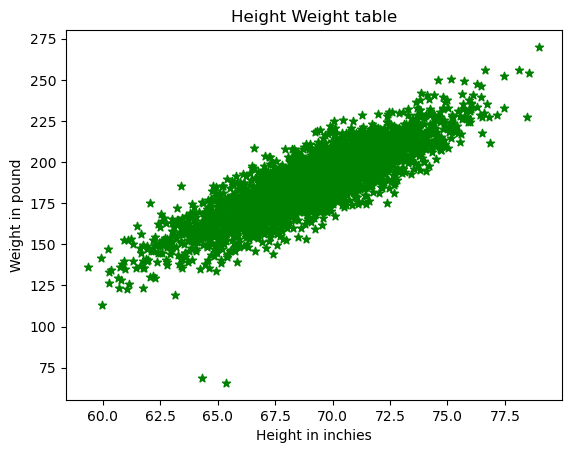

In [4]:
plt.scatter(df.Height , df.Weight, color='green', marker='*') #call scatter function for drWING PLOT
plt.xlabel('Height in inchies')#define x axis 
plt.ylabel('Weight in pound')#define y axis
plt.title('Height Weight table')#figure title

In [5]:
x = df.drop('Weight', axis=1)#define dependant variable
y = df[['Weight']]#define independant variable

In [6]:
x.head() #view independant variable columns

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796


In [7]:
y.shape #number of rows and columns in independant variable 

(3501, 1)

In [8]:
y.head() #view dependant variable 

,Weight
0,241.893563
1,162.310473
2,212.740856
3,220.042470
4,206.349801


In [9]:
y.shape #number of rows and columns in dependant variable 

(3501, 1)

In [10]:
x.mean()# mean value of independant variable

Height    69.024411
dtype: float64

In [11]:
y.mean()# mean value of independant variable

Weight    186.891258
dtype: float64

In [12]:
from sklearn.model_selection import train_test_split #import train_test_split function from model selection from sklearn

In [13]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=.25, random_state=0) #seperate testing(25%) and training data(75%)

In [14]:
xtrain.shape #training set data 75%

(2625, 1)

In [15]:
xtest.shape #testing set data 25%

(876, 1)

In [16]:
xtrain.head()#viewing train set independant variable values

,Height
1310,67.847749
3153,65.215556
3333,63.873409
1002,69.156982
1765,68.503261


In [17]:
ytrain.head()#viewing train set dependant variable values

,Weight
1310,153.031321
3153,174.931143
3333,152.554620
1002,206.515190
1765,193.982059


In [18]:
xtest.head()#viewing testing set independant variable values

,Height
1269,72.165757
118,67.738963
2810,71.359472
2621,68.074623
1535,66.854111


In [19]:
ytest.head()#viewing testing set dependant variable values

,Weight
1269,204.577436
118,178.170556
2810,197.472656
2621,171.695510
1535,180.544377


# Linear Regression

In [20]:
# https://scikit-learn.org/stable/supervised_learning.html#supervised-learning
from sklearn.linear_model import LinearRegression #import LinearRegression Model

In [21]:
lr = LinearRegression() # call linear Regreesion Method

In [22]:
lr.fit(xtrain, ytrain) # training the model

LinearRegression()

In [23]:
m = lr.coef_ #calculaing the value of m(slope or gradiant value) for total training set values
m

array([[5.96613032]])

In [24]:
c = lr.intercept_  #calculaing the value of c(intercept value) for total  training set values
c

array([-224.98706384])

In [25]:
yp = (m*67.847749)+c
yp

array([[179.80144877]])

In [26]:
yp = (m*69.156982)+c
yp

array([[187.61250347]])

In [27]:
lr.predict([[72.165757]])

array([[205.56324723]])

In [28]:
x.head()

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796


In [29]:
y.head()

,Weight
0,241.893563
1,162.310473
2,212.740856
3,220.042470
4,206.349801


In [32]:
df['predicted_weight'] = lr.predict(x)
df.head()

,Height,Weight,predicted_weight
0,73.847017,241.893563,215.593864
1,68.781904,162.310473,185.374740
2,74.110105,212.740856,217.163483
3,71.730978,220.042470,202.969301
4,69.881796,206.349801,191.936837


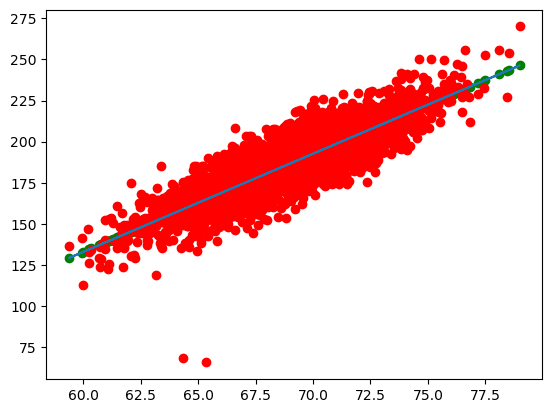

In [49]:
plt.plot(x, df[['predicted_weight']]) # plt.plot(x.squeeze(), df[['predicted_weight']])
plt.scatter(x, df[['predicted_weight']], color='green') #scatter ploting of predicted values
#plt.plot(x, df[['Weight']])
plt.scatter(x, df[['Weight']],color='red') # the dependent variable in testing set

In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error # import MEA ,MAE method from sklearn.matrics library

In [34]:
mse = mean_squared_error(ytest, lr.predict(xtest)) #mean squared error measuement 
mae = mean_absolute_error(ytest, lr.predict(xtest)) #mean absolute error value measurement

In [47]:
mae #Mean absolute error rate

8.145588569833935

In [46]:
mse #Mean Squared Error rate

103.70875574105973

In [44]:
lr.score(xtest, ytest)

0.7400625947962998

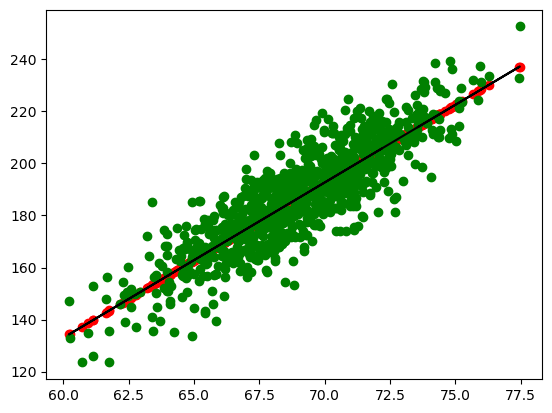

In [48]:
plt.plot(xtest, lr.predict(xtest),color='black')      # plt.plot(x.squeeze(), df[['predicted_weight']])
plt.scatter(xtest, lr.predict(xtest),color='red')
#plt.scatter(x, df[['Weight']])
plt.scatter(xtest, ytest, color='green')